In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/gopalmacbook/Downloads/aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 1. Defining Problem Statement and Analysing basic metrics

## 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [3]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=180, step=1)

In [5]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (180, 9)


In [6]:
print("Data Types of Attributes:")
print(df.dtypes)

Data Types of Attributes:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [7]:
# #conversion of categorical attributes to 'category'
# df['Product'] = df['Product'].astype('category')
# df['Gender'] = df['Gender'].astype('category')
# df['MaritalStatus'] = df['MaritalStatus'].astype('category')

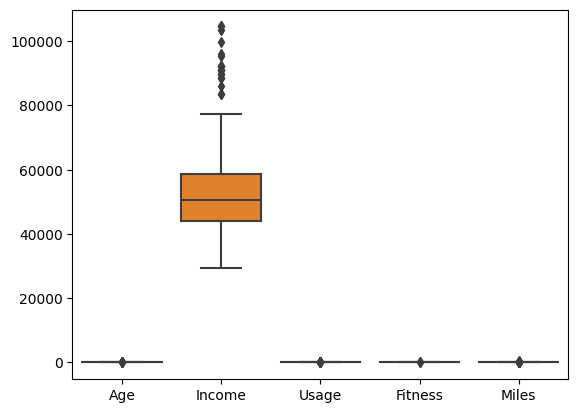

In [8]:
sns.boxplot(data=df[['Age', 'Income', 'Usage', 'Fitness', 'Miles']])
plt.show()

In [9]:
print("Statistical Summary of the Dataset:")
print(df.describe(include='all'))

Statistical Summary of the Dataset:
       Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000

In [10]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [11]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# 2. Non-Graphical Analysis: Value counts and unique attributes

In [13]:
product_counts = df['Product'].value_counts()
print("Value Counts for 'Product Purchased':")
print(product_counts)

Value Counts for 'Product Purchased':
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [14]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      104
Female     76
Name: count, dtype: int64

In [15]:
marital_status_counts = df['MaritalStatus'].value_counts()
marital_status_counts

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [16]:
fitness_counts = df['Fitness'].value_counts()
fitness_counts

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [17]:
usage_counts = df['Usage'].value_counts()
usage_counts

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [18]:
df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

[]

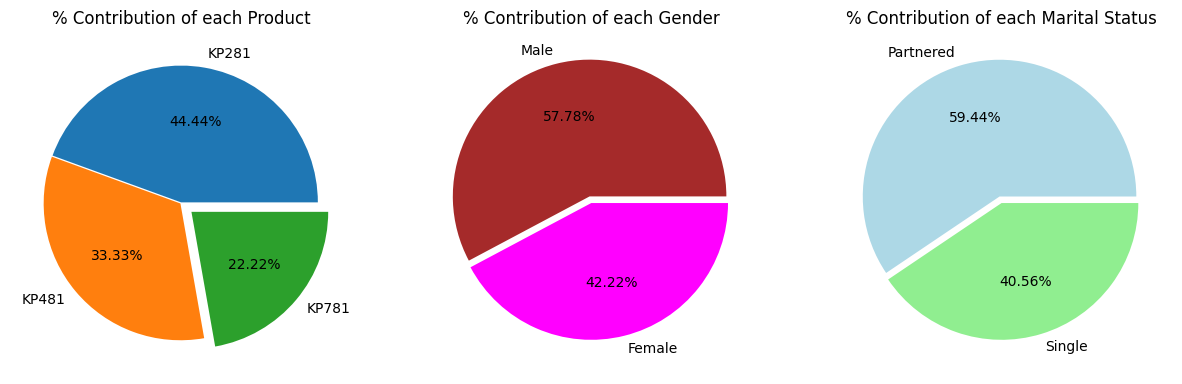

In [19]:
# Assuming 'Product', 'Gender', and 'MaritalStatus' are the correct column names in the DataFrame 'df'
prod_dist = np.round(df['Product'].value_counts(normalize=True) * 100, 2).to_frame()
prod_dist.reset_index(inplace=True)
prod_dist.columns = ['Product', 'Percentage']

plt.figure(figsize=(15, 30))

plt.subplot(1, 3, 1)
plt.title('% Contribution of each Product')
plt.pie(x=prod_dist['Percentage'], explode=[0.005, 0.005, 0.1], labels=prod_dist['Product'], autopct='%.2f%%')

# Check that 'Gender' is the correct column name in your DataFrame 'df'
gender_dist = np.round(df['Gender'].value_counts(normalize=True) * 100, 2).to_frame()
gender_dist.reset_index(inplace=True)
gender_dist.columns = ['Gender', 'Percentage']

plt.subplot(1, 3, 2)
plt.title('% Contribution of each Gender')
plt.pie(x=gender_dist['Percentage'], explode=[0.05, 0], labels=gender_dist['Gender'], autopct='%.2f%%', colors=['brown', 'magenta'])

# Check that 'MaritalStatus' is the correct column name in your DataFrame 'df'
marital_status_dist = np.round(df['MaritalStatus'].value_counts(normalize=True) * 100, 2).to_frame()
marital_status_dist.reset_index(inplace=True)
marital_status_dist.columns = ['MaritalStatus', 'Percentage']

plt.subplot(1, 3, 3)
plt.title('% Contribution of each Marital Status')
plt.pie(x=marital_status_dist['Percentage'], explode=[0.05, 0], labels=marital_status_dist['MaritalStatus'], autopct='%.2f%%', colors=['lightblue', 'lightgreen'])

plt.plot()

# 3. Visual Analysis - Univariate & Bivariate

## 3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

## Univariate

Distribution of the data for the quantitative attributes:
1. Age
2. Income
3. Fitness
4. Education
5. Usage 
6. Miles

#### 1) The ages of the Aerofit Customers distribution

[]

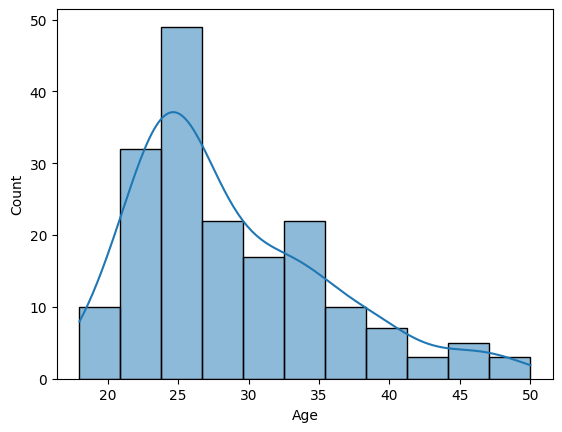

In [20]:
plt.figure()
sns.histplot(data = df, x = 'Age', kde = True)
plt.plot()

* Less than 10% customers are aged 40 years and above.
* Most of the customers (more than 80% of the total) are aged between 20 and 30 years.

[]

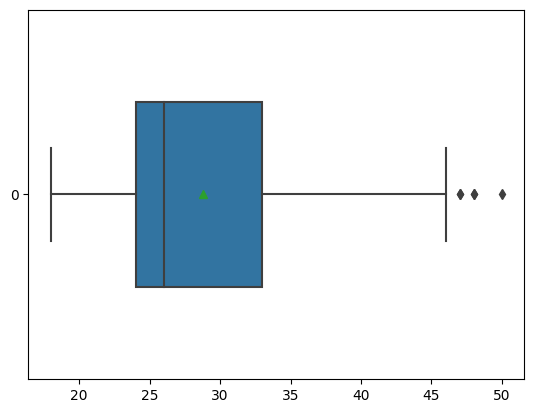

In [21]:
sns.boxplot(data = df['Age'], width = 0.5, orient = 'h', showmeans = True)
plt.plot()

In [22]:
result = df[(df["Age"] >= 20) & (df['Age'] <= 35)]['Product'].count() / len(df) * 100
" Age is between 20 and 35 is %.2f%%"%(result)

' Age is between 20 and 35 is 81.67%'

In [23]:
data = df['Age']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  28.788888888888888
Median :  26.0
1st Quartile :  24.0
3rd Quartile :  33.0
Innerquartile Range :  9.0
Upper Bound :  46.5
Lower Bound :  10.5
Outliers :  [47, 47, 48, 48, 50]
No of Outliers :  5


In [24]:
def age_partitions(x):
    if x <= 24:
        return '<= 24 '
    elif 25 < x <= 33:
        return '25 - 33'
    elif 34 < x <= 46:
        return '34 - 46'
    else:
        return '> 46'
df['age_bins'] = df['Age'].apply(age_partitions)
df['age_bins'].loc[np.random.randint(0, 180, 10)]

47     25 - 33
57     25 - 33
55     25 - 33
172       > 46
85      <= 24 
144     <= 24 
149     <= 24 
104       > 46
153       > 46
117    25 - 33
Name: age_bins, dtype: object

#### 2) Annual income of the Aerofit Customers distributed

[]

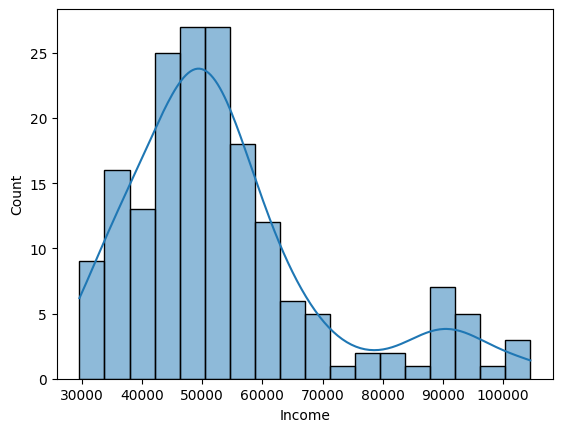

In [25]:
plt.figure()
sns.histplot(data = df, x = 'Income', kde = True, bins = 18)
plt.plot()

* 80 % of the customers annual salary is less than 65000$.
* Majority of the customers earn in between 35000 and 60000 dollars annually.

[]

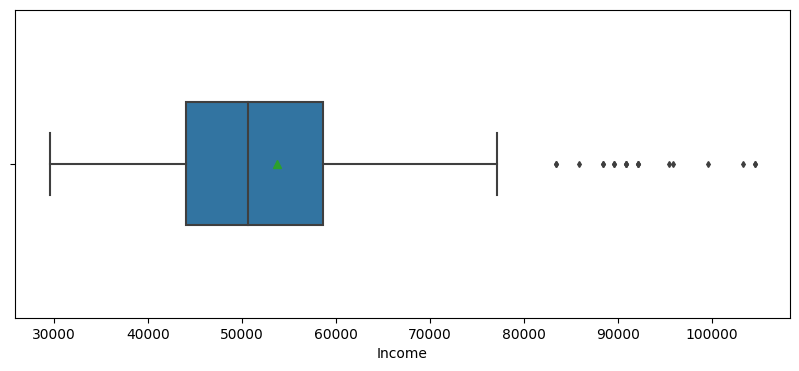

In [26]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = df, x = 'Income', width = 0.4, orient = 'h', showmeans = True, fliersize = 3)
plt.plot()

In [27]:
data = df['Income']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  53719.57777777778
Median :  50596.5
1st Quartile :  44058.75
3rd Quartile :  58668.0
Innerquartile Range :  14609.25
Upper Bound :  80581.875
Lower Bound :  22144.875
Outliers :  [83416, 83416, 85906, 88396, 88396, 89641, 89641, 90886, 90886, 90886, 92131, 92131, 92131, 95508, 95866, 99601, 103336, 104581, 104581]
No of Outliers :  19


In [28]:
def income_partitions(x):
    if x < 45000:
        return '< 45k '
    elif 45000 <= x < 60000:
        return '45k - 60k'
    elif 60000 <= x < 80000:
        return '60k - 80k'
    else:
        return '> 80k'
df['income_bins'] = df['Income'].apply(income_partitions)
df['income_bins'].loc[np.random.randint(0, 180, 10)]

105    45k - 60k
32        < 45k 
123    45k - 60k
5         < 45k 
35     45k - 60k
54     45k - 60k
16        < 45k 
29     45k - 60k
136    45k - 60k
170        > 80k
Name: income_bins, dtype: object

#### 3) How is the self rated fitness scale of Aerofit Treadmill customers distributed ?

[]

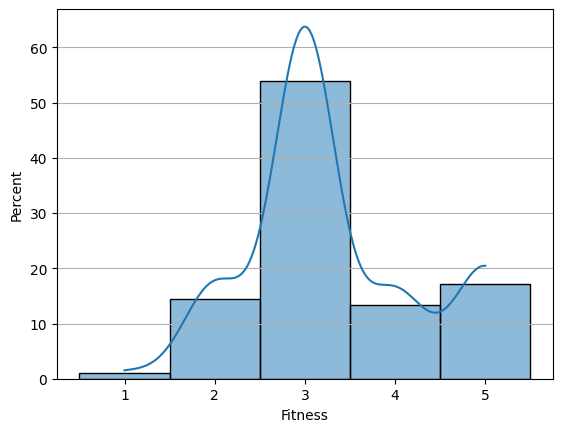

In [29]:
plt.figure()
sns.histplot(data = df, x = 'Fitness', discrete = True, kde = True, stat = 'percent')
plt.yticks(np.arange(0, 101, 10))
plt.grid(axis = 'y')
plt.plot()

* Around 70 % of the aerofit customers rate themselves 3 or less than 3 in fitness scale.
* Around 30% of the total customers rate themselves 4 or above in the fitness scale.
* More than 50% customers rate themselves 3 out of 5 in self rated fitness scale
* Less than 20 % of aerofit customers have excellent shape.

#### 4) Education (in years) of Aerofit Treadmill customers distributed 

[]

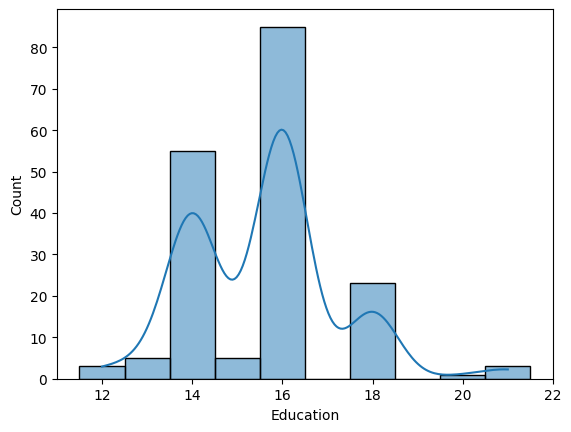

In [30]:
sns.histplot(data = df, x = 'Education', discrete = True, kde = True)
plt.plot()

It can be evidently observed in the above plot that most customers have 16 years of Education, followed by 14 years and 18 years.

#### 5) number of times the Aerofit Treadmill customers plan to use the treadmill each week distribution

[]

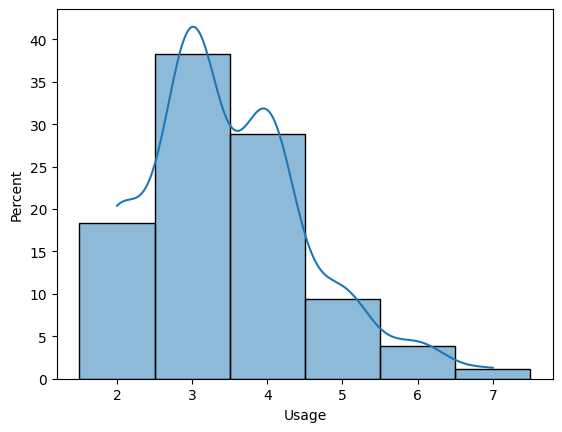

In [31]:
sns.histplot(data = df, x = 'Usage', kde = True, stat = 'percent', discrete = True)
plt.plot()

* There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.
* Based on the above plot, it appears that most customers use treadmills on alternate days.

#### 6) Count of customers vs the expected number of miles customers run / walk each week

[]

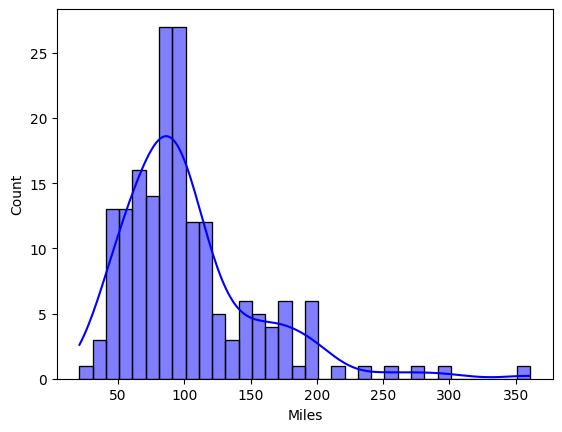

In [32]:
plt.figure()
sns.histplot(data = df, x = 'Miles', kde = True, binwidth = 10, color = 'blue')
plt.plot()

We can see that most customers expect to walk or run between 40 and 120 miles a week.

#### Histogram

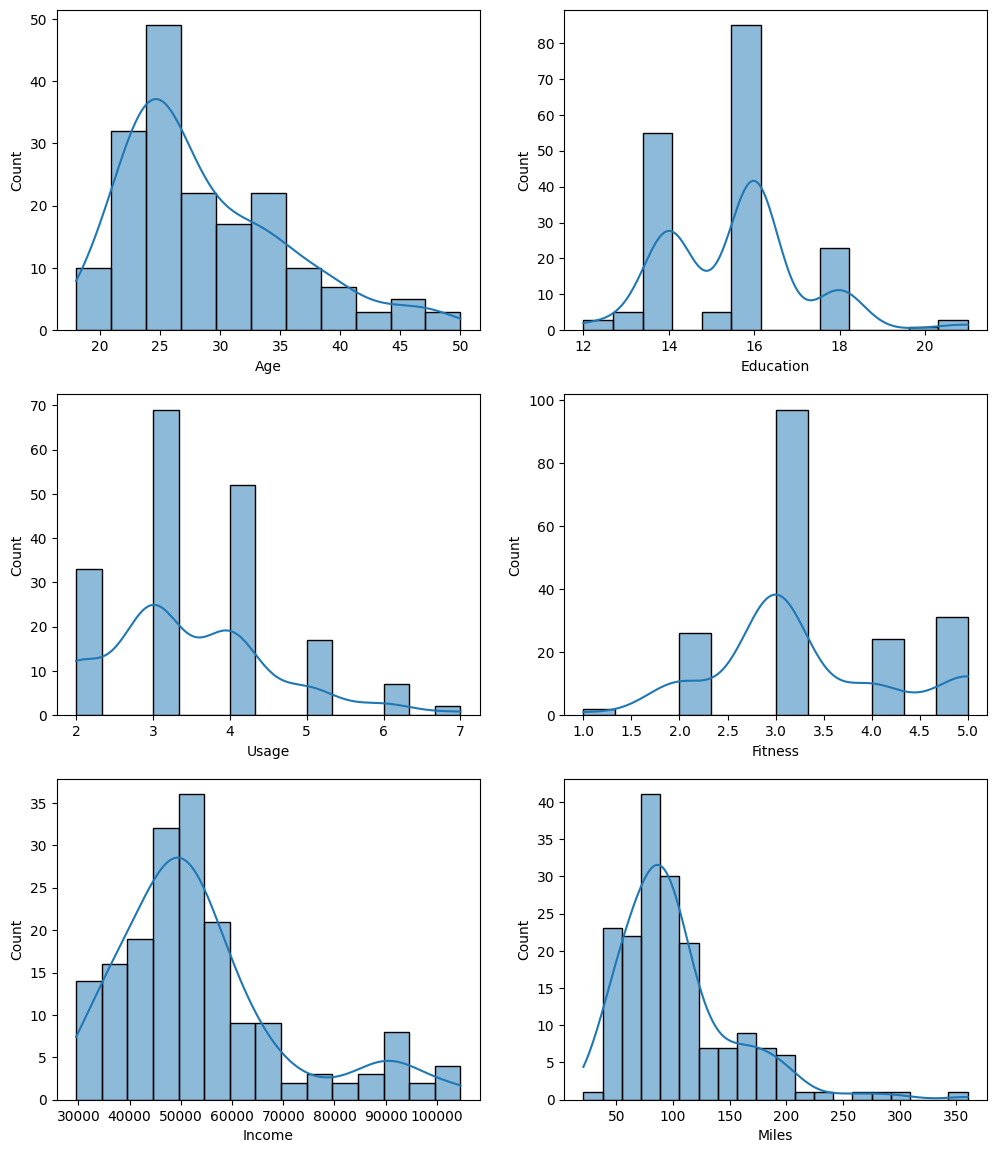

In [33]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

Outliers detection using BoxPlots

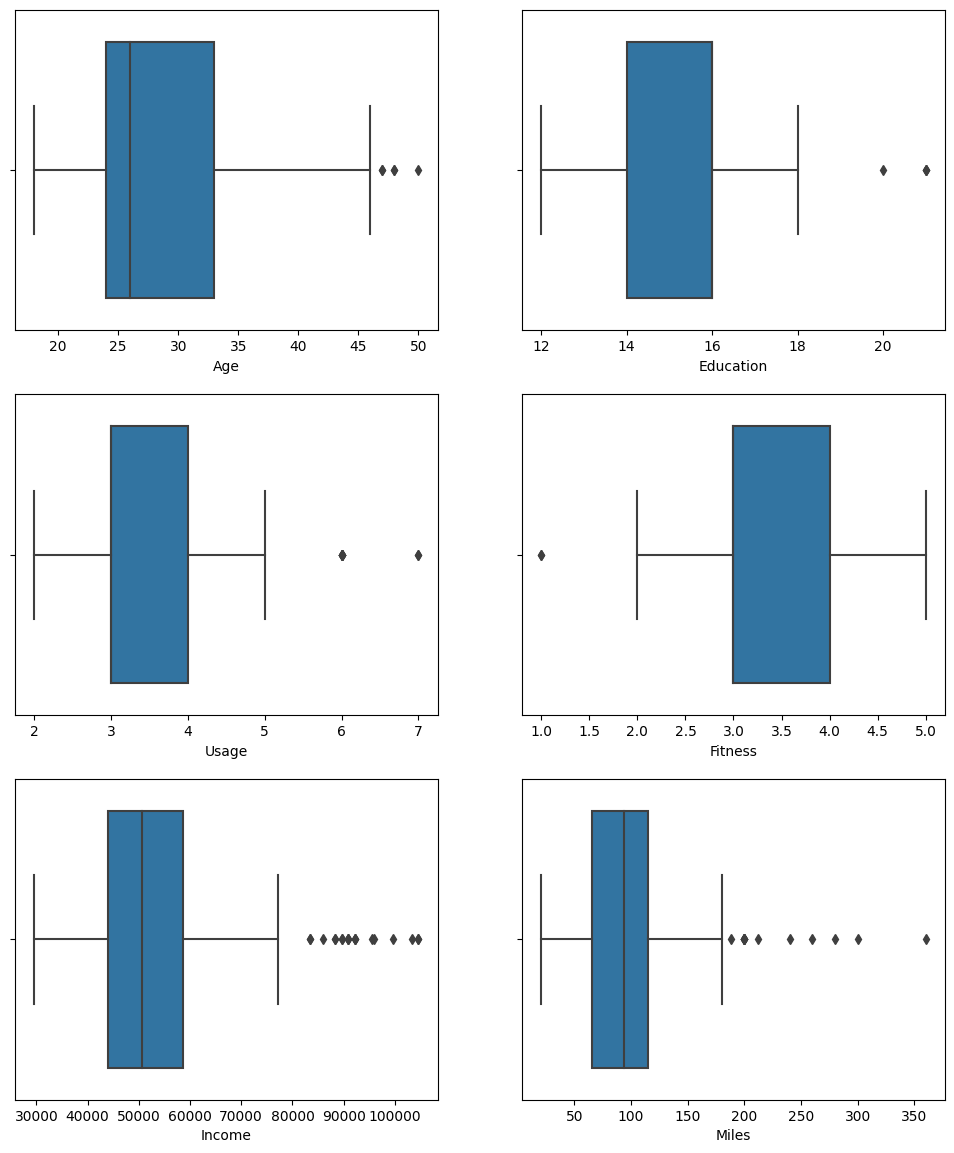

In [34]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Even from the boxplots it is quite clear that:

* Age, Education and Usage are having very few outliers.
* While Income and Miles are having more outliers.

#### Countplot

Understanding the distribution of the data for the qualitative attributes:
* Product
* Gender
* MaritalStatus

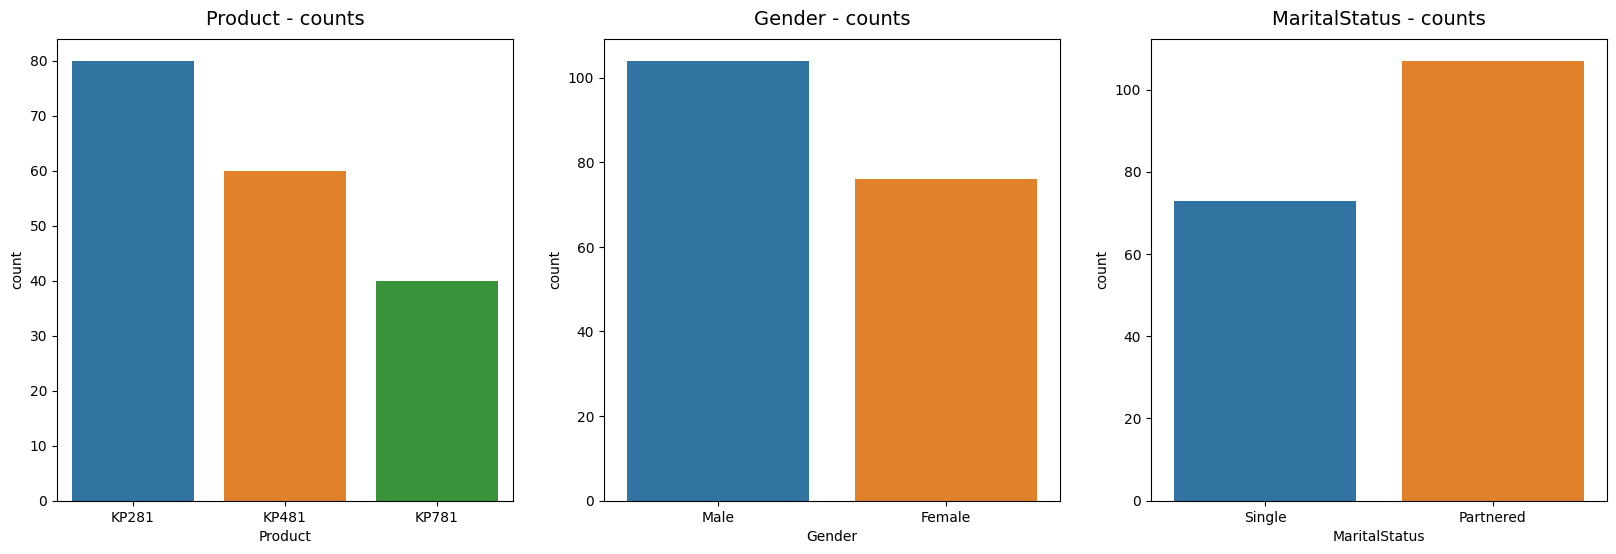

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])


axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

* KP281 is the most frequent product.
* Thare are more Males in the data than Females.
* More Partnered persons are there in the data.

In [36]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Product
* 44.44% of the customers have purchased KP2821 product.
* 33.33% of the customers have purchased KP481 product.
* 22.22% of the customers have purchased KP781 product.

Gender
* 57.78% of the customers are Male.

MaritalStatus
* 59.44% of the customers are Partnered.

## 2.1 For categorical variable(s): Boxplot

### Bivariate Analysis

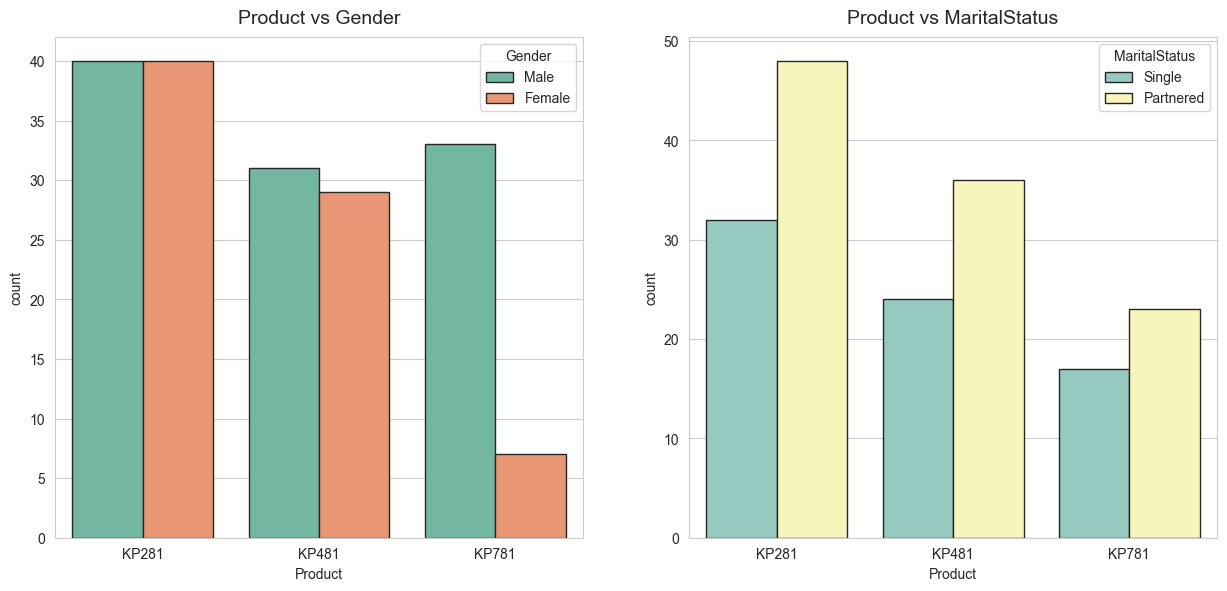

In [37]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

Product vs Gender
* It can be observed that most people buy the entry-level treadmills.
* The number of males buying the treadmills having advanced features is around 5 times the number of females buying the same.
* Equal number of males and females have purchased KP281 product and Almost same for the product KP481
* Most of the Male customers have purchased the KP781 product.

Product vs MaritalStatus
* Customer who is Partnered, is more likely to purchase the product.

[]

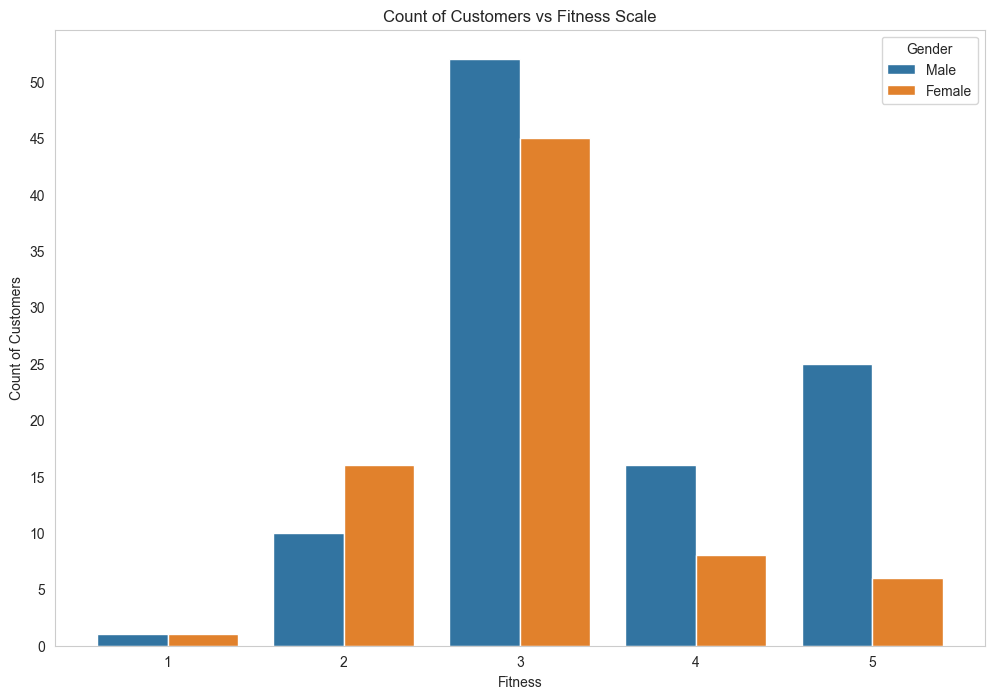

In [38]:
plt.figure(figsize = (12, 8))
plt.title('Count of Customers vs Fitness Scale')
sns.countplot(data = df, x = 'Fitness', hue = 'Gender')                    
plt.grid(axis = 'y')
plt.yticks(np.arange(0, 60, 5))
plt.ylabel('Count of Customers')
plt.plot()

* Most of the males and females (more than 50% customers) find themselves in the fitness scale 3 .
* For fitness scales 4 and 5, there are roughly 3 times more males than females.
* There is a slight difference in the number of males and females in all the fitness scales except for high fitness scales.


[]

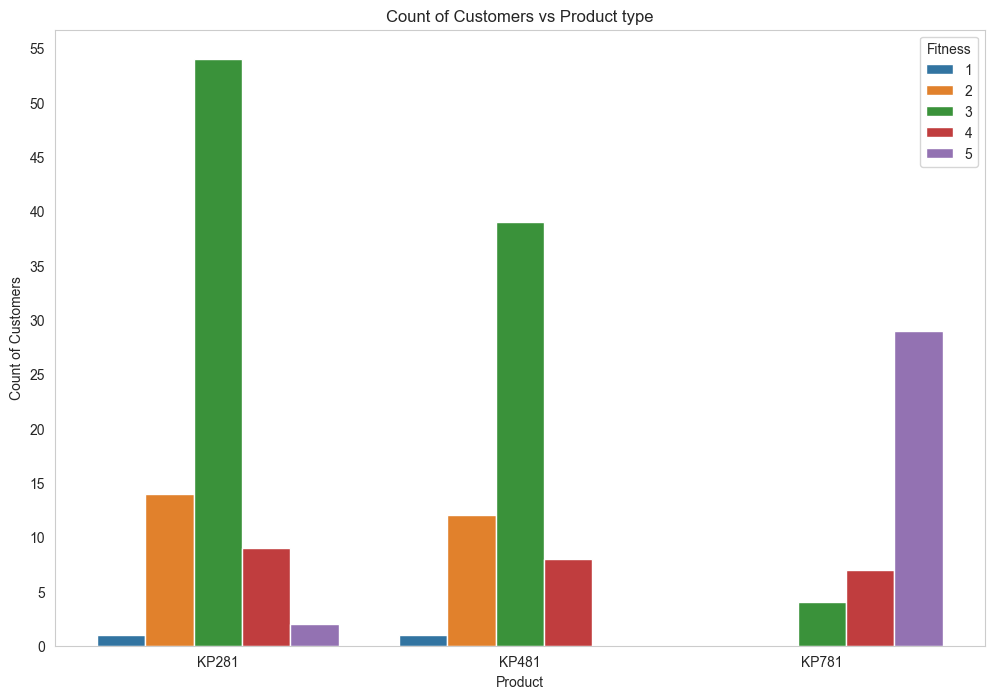

In [39]:
# For Male, different product categories and 
plt.figure(figsize = (12, 8))
plt.title("Count of Customers vs Product type")
plt.yticks(np.arange(0, 60, 5))
sns.countplot(data = df, x = 'Product', hue = 'Fitness')
plt.ylabel('Count of Customers')
plt.grid(axis = 'y')
plt.plot()

* The treadmill having advanced features are mostly used by the people with high fitness levels.
* The customers who rate themselses 3 out of 5 in self rated fitness scale are more likely to invest in the entry-level treadmills or treadmills for mid-level runners i.e., KP281 and KP481 respectively and they are more unlikey to buy the treadmill which has advanced features i.e., KP781.
* The customers who rate themselves 3 or below in the self-rated fitness scale do not buy KP781.

[]

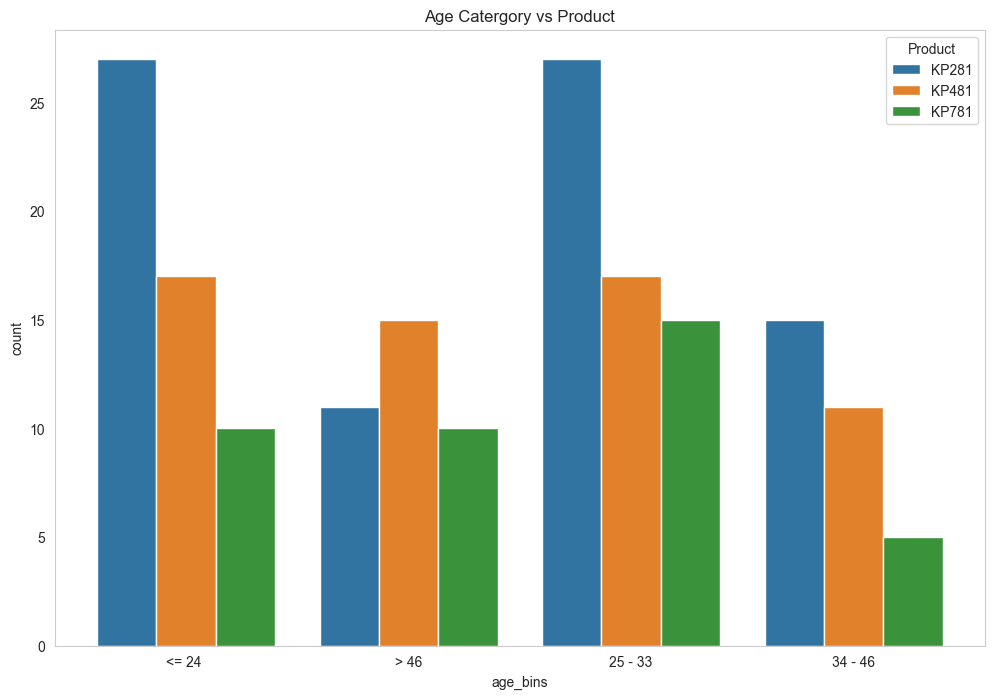

In [40]:
#Age Category
plt.figure(figsize = (12, 8))
plt.title("Age Catergory vs Product")
sns.countplot(data = df, x = 'age_bins', hue = 'Product')
plt.grid(axis = 'y')
plt.plot()

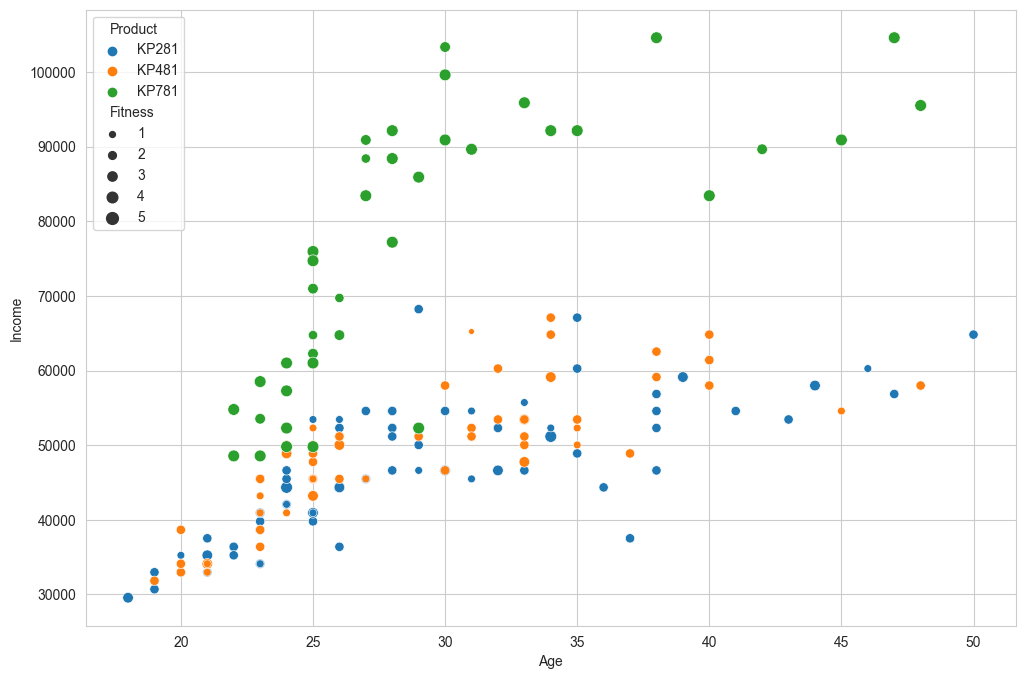

In [41]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x= 'Age', y = 'Income', hue = 'Product', size = 'Fitness')
plt.show()

* The customers having high annual income and high fitness scale generally buys KP781.
* The customers having low fitness scale or low annual income generally buy KP281 and KP481.

### Age range of the customers who purchase a specific type of product

[]

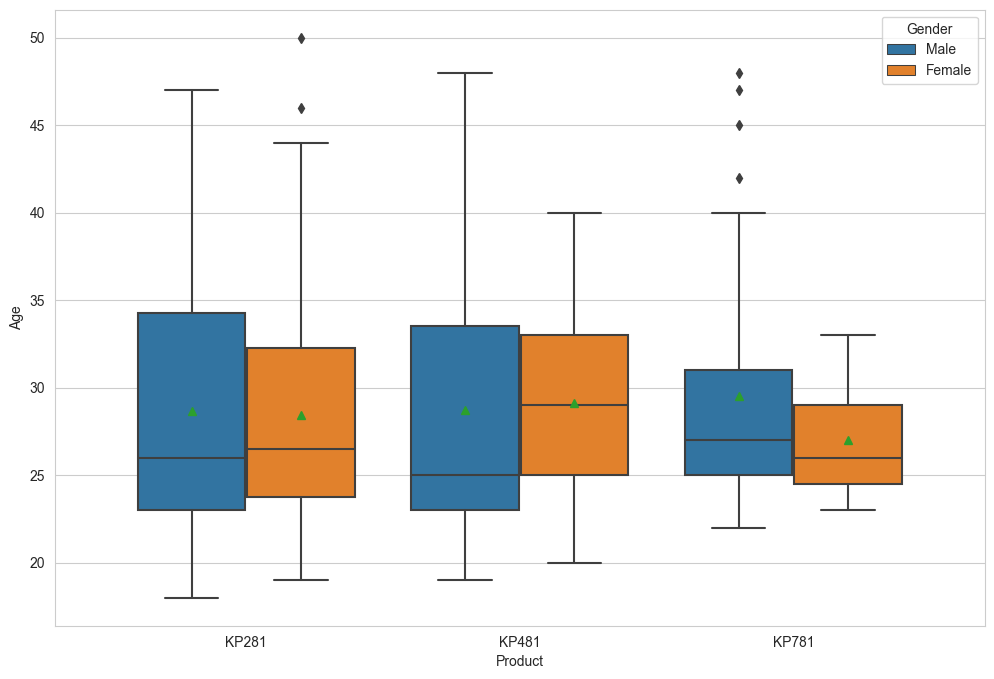

In [42]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'Product', y = 'Age', hue = 'Gender', showmeans = True)
plt.plot()

* Most customers were in their 20s or 30s.
* The age range of KP781 customers is smaller than the age range of the customers who bought other two products.
* There is a significant difference in the median age of males and females who bought KP481.
* For any product, the age range for males is higher than that of female. The range difference is significant for the product KP781.

In [43]:
data = df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Male'), 'Age']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)


Mean :  29.545454545454547
Median :  27.0
Quartile 1 :  25.0
Quartile 3 :  31.0
Inner Quartile Range :  6.0
Upper :  40.0
Lower :  16.0
Outliers :  [42, 45, 47, 48]
No of Outliers :  4


 * In the boxplot above the sample calculation that we have exactly 4 outliers in the data of age of the males who bought KP781 treadmill.

### The income range of the customers who purchase a specific type of product

[]

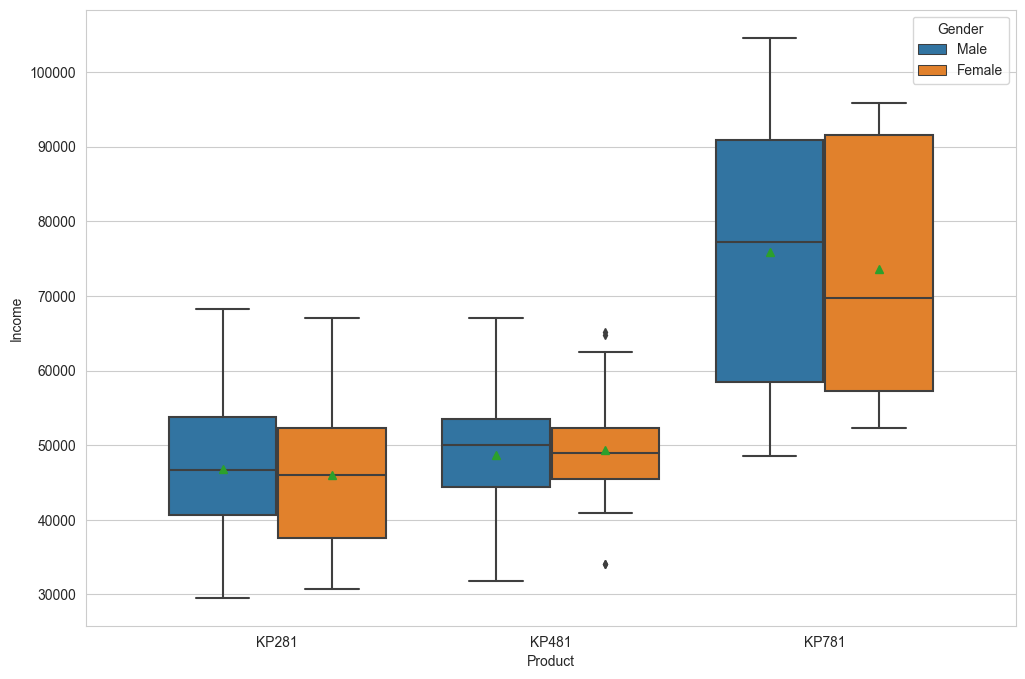

In [44]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'Product', y = 'Income', hue = 'Gender', showmeans = True, fliersize = 4)
plt.plot()

* The median income of customers who bought KP781 is much higher than that of the customers who bought other two products.
* The range of income for customers buying KP781 is much higher than the same for customers buying KP281 and KP481.

In [45]:
data = df.loc[(df['Product'] == 'KP481') & (df['Gender'] == 'Female'), 'Income']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  49336.44827586207
Median :  48891.0
Quartile 1 :  45480.0
Quartile 3 :  52302.0
Inner Quartile Range :  6822.0
Upper :  62535.0
Lower :  35247.0
Outliers :  [34110, 34110, 65220, 64809]
No of Outliers :  4


[]

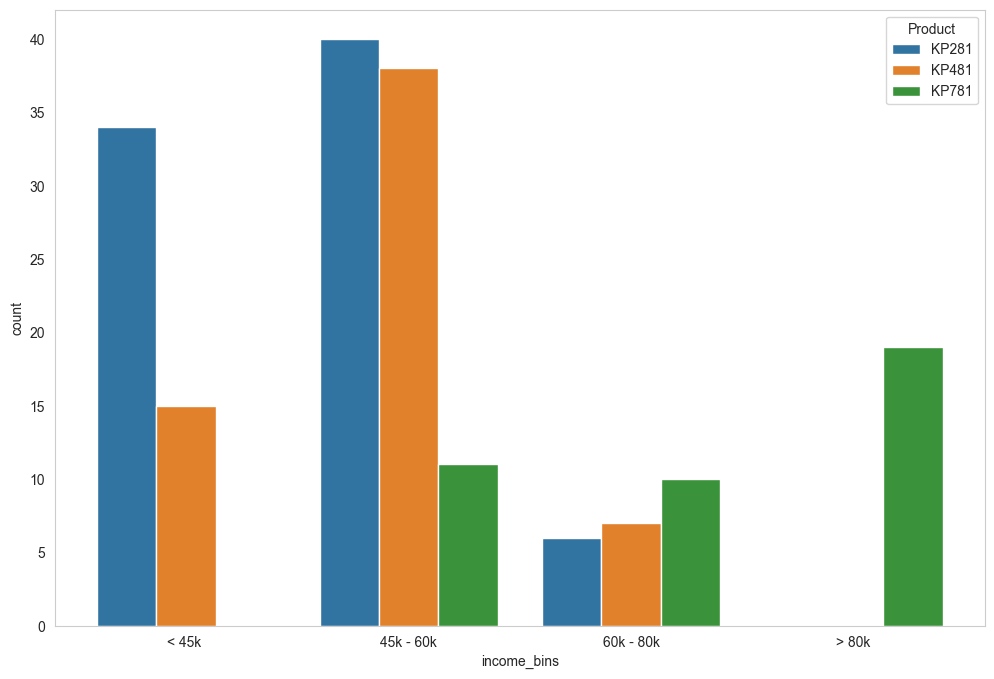

In [46]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'income_bins', hue = 'Product')
plt.grid(axis = 'y')
plt.plot()

* The customers with high annual salary (60k and above) are more likely to buy KP781.
* The customers with annual salary < 60k are more likely to buy KP281 and KP481.

### Summary

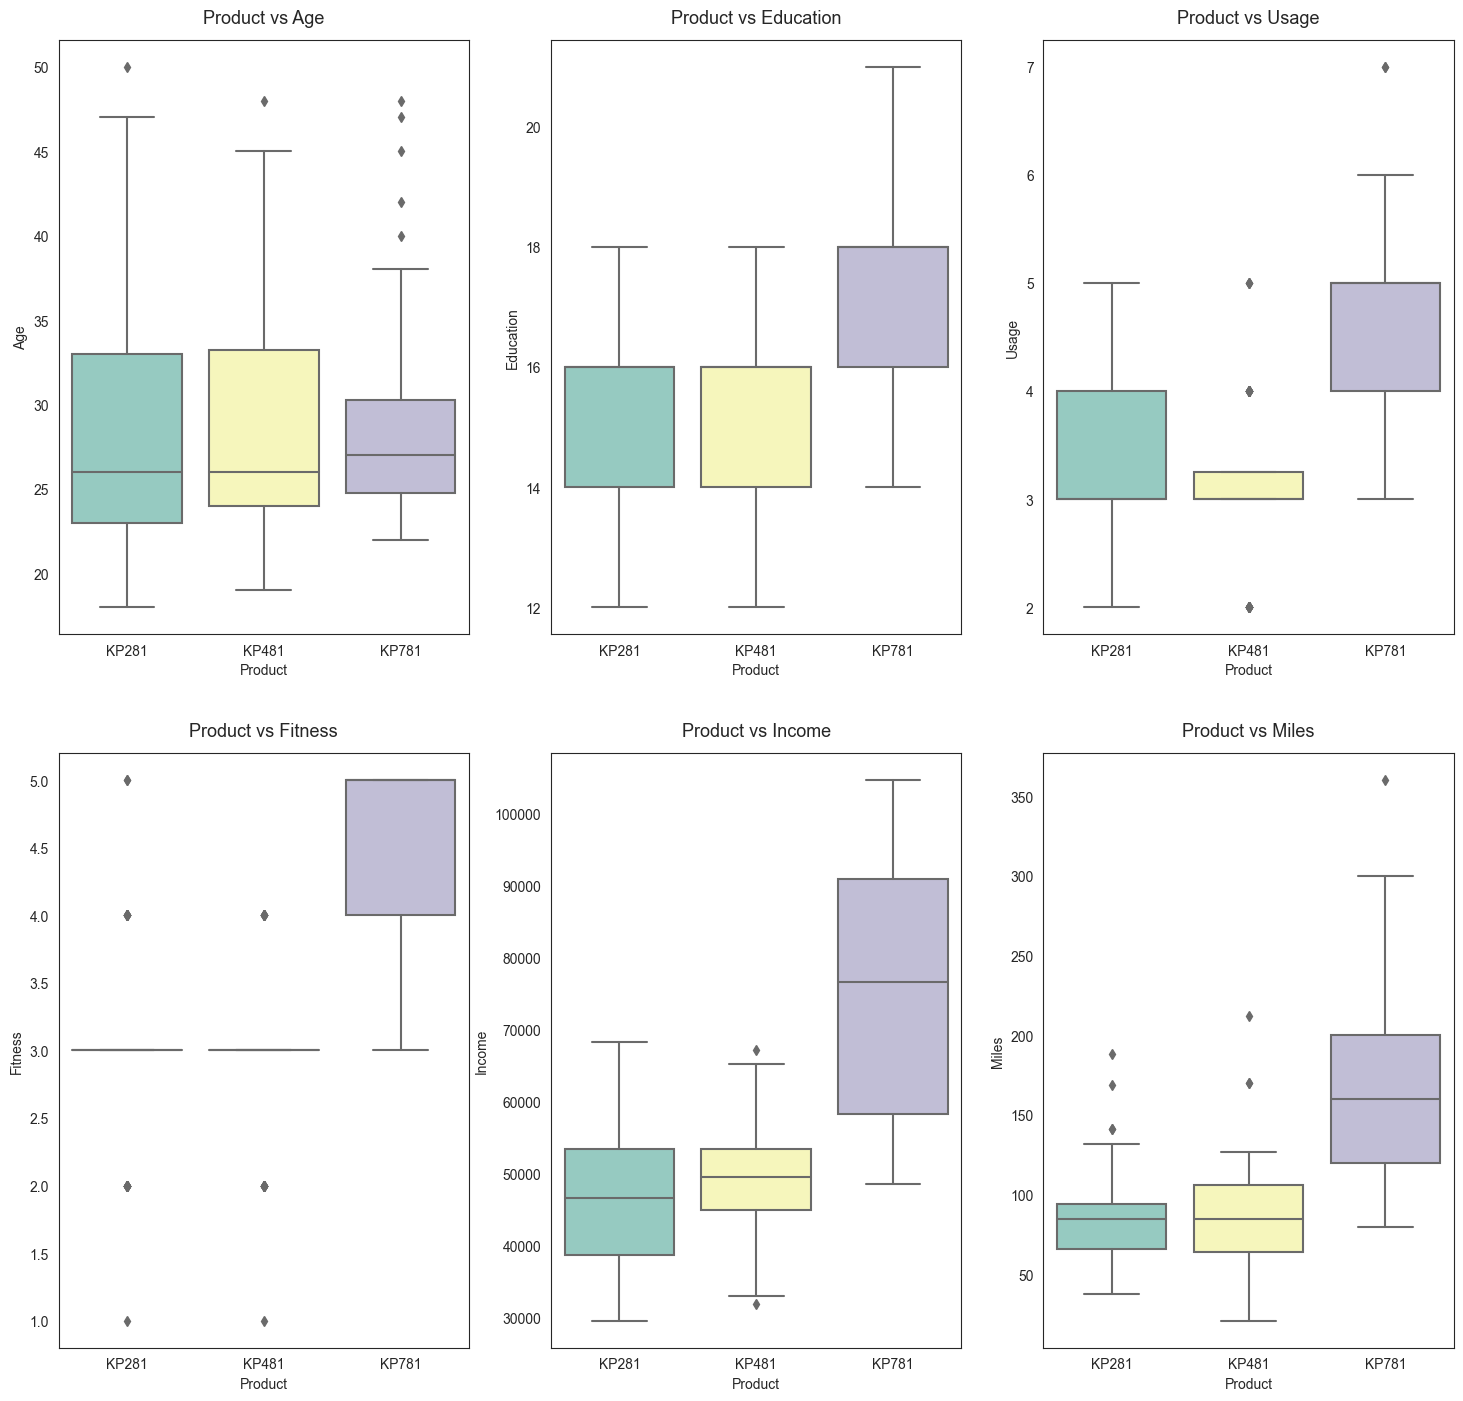

In [47]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

1. Product vs Age
* Customers purchasing products KP281 & KP481 are having same Age median value.
* Customers whose age lies between 25-30, are more likely to buy KP781 product
2. Product vs Education
* Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
* While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
3. Product vs Usage
* Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
* While the other customers are likely to purchasing KP281 or KP481.
4. Product vs Fitness
* The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
5. Product vs Income
* Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
6. Product vs Miles
* If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.


## 3.3 For correlation: Heatmaps, Pairplots

### Coorelation between measurable quantities

[]

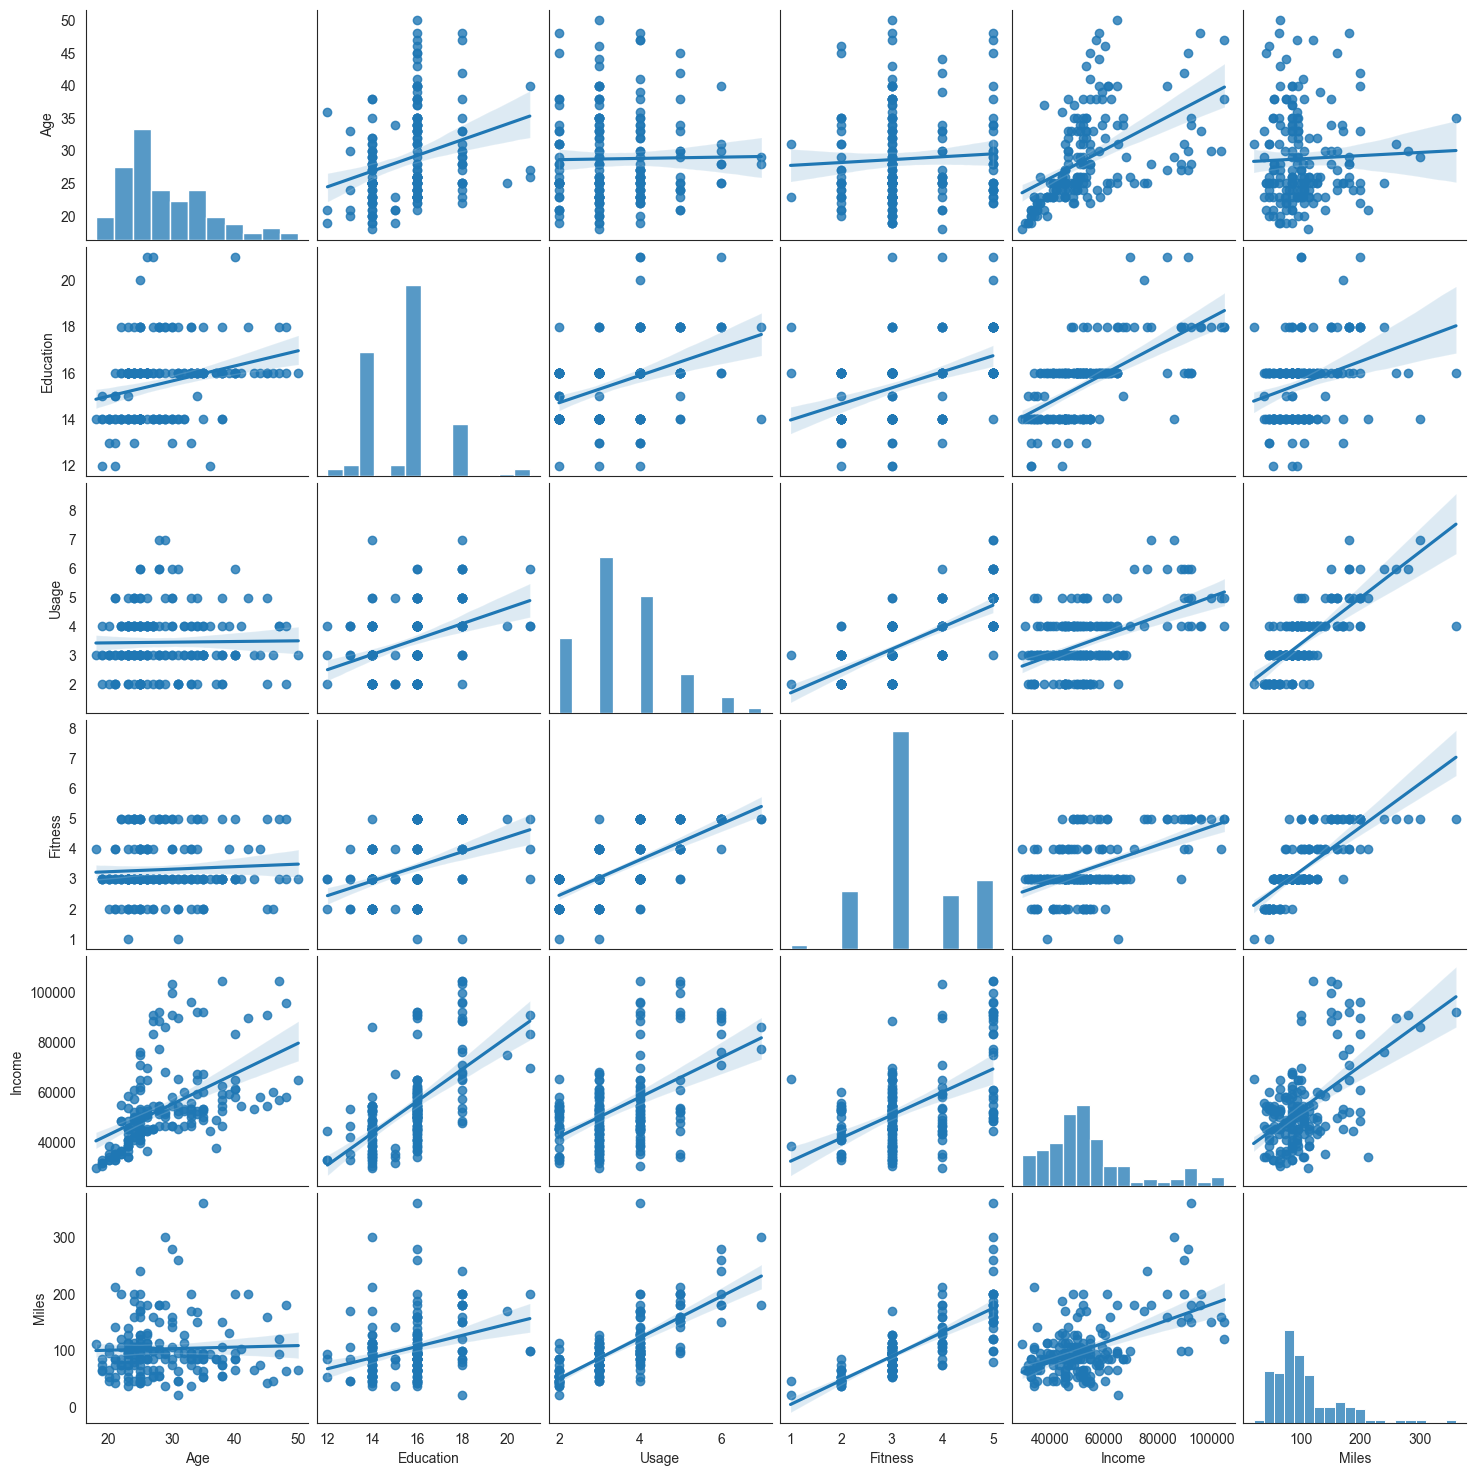

In [48]:
sns.pairplot(data = df, kind = 'reg') 
plt.plot()

In [49]:
selected_columns = ['Age', 'Usage', 'Income', 'Fitness', 'Miles']
corr_df = df[selected_columns]
corr_matrix = corr_df.corr()

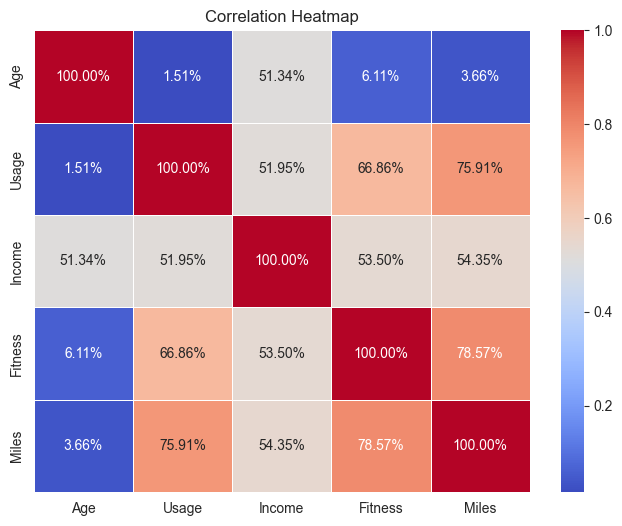

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2%', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* The customer with high fitness scale is more likely to run or walk more miles.
* The customer who expects to use the treadmill more times in a week generally expects to walk or run more miles in the week.
* The customer who have a high fitness scale generally uses the treadmill more frequently in a week.

## Correlation Between Miles and FitnessLevel :


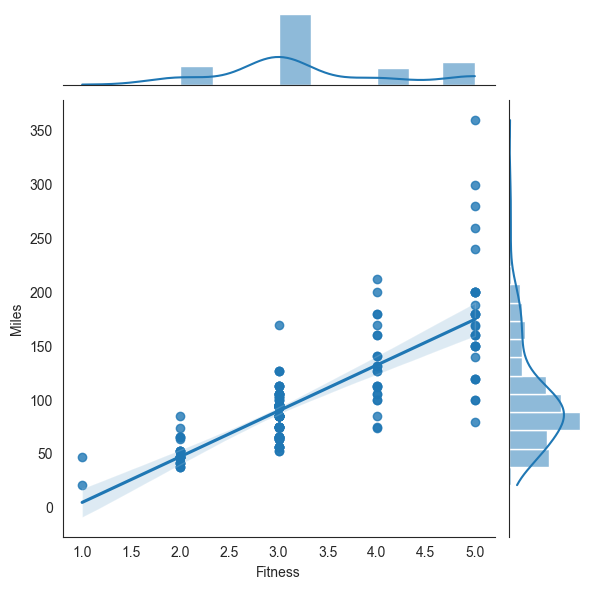

In [69]:
sns.jointplot(x = data["Fitness"],
              y= data["Miles"],
             height=6, kind="reg")

### Correlation between Income and miles

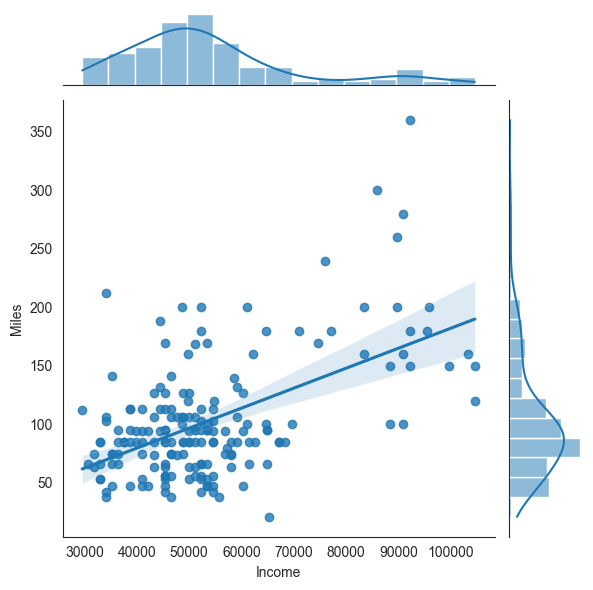

In [70]:
sns.jointplot(x = data["Income"],
              y= data["Miles"],
             height=6, kind="reg")

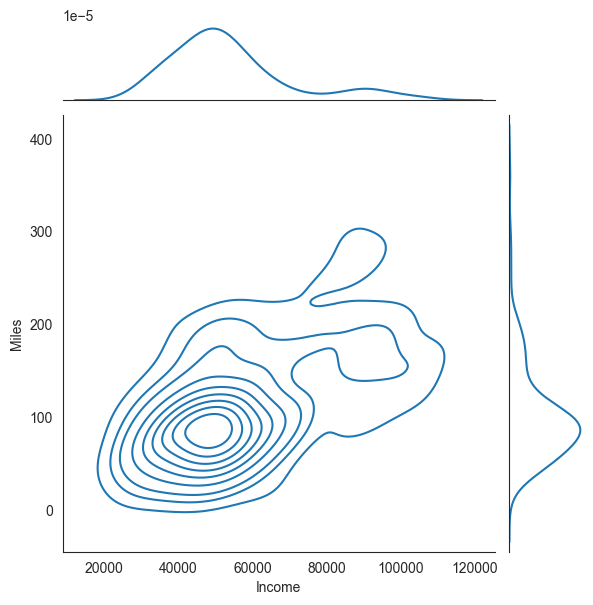

In [71]:
sns.jointplot(x = data["Income"],
              y= data["Miles"],
             height=6, kind="kde")

* Majority customer base has earning from 25,000 to 75,000USD
* and prefer to exercises very less to 175 miles a week.

# 4. Missing Value & Outlier Detection 

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

In [ ]:
np.any(df.isna())

* It can be clearly seen from the above that the DataFrame does not contain any missing value.

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Usage', 'Income', 'Fitness', 'Miles']], orient='h', palette='Set1')
plt.title('Outlier Detection - Boxplots')
plt.xlabel('Values')
plt.show()

# 5. Business Insights based on Non-Graphical and Visual Analysis

## 5.1 Comments on the range of attributes

In [ ]:
attribute_ranges = df.describe().loc[['min', 'max']].T
print("Attribute Ranges:")
print(attribute_ranges)

In [ ]:
print("\nData Types:")
print(df.dtypes)

In [ ]:
print("\nComments on the Range of Attributes:")
# Age
age_min = attribute_ranges.loc['Age', 'min']
age_max = attribute_ranges.loc['Age', 'max']
print(f"Age ranges from {age_min} to {age_max} years. This indicates that the age of customers purchasing treadmills varies from {age_min} to {age_max} years, covering a wide range of age groups.")

In [ ]:
#usage
usage_min = attribute_ranges.loc['Usage', 'min']
usage_max = attribute_ranges.loc['Usage', 'max']
print(f"Usage ranges from {usage_min} to {usage_max} times per week. The range suggests that customers plan to use the treadmill anywhere from {usage_min} to {usage_max} times a week, with some individuals planning to use it more frequently.")

In [ ]:
# Income
income_min = attribute_ranges.loc['Income', 'min']
income_max = attribute_ranges.loc['Income', 'max']
print(f"Income ranges from ${income_min} to ${income_max}. This indicates that customers' annual income who purchased treadmills varies from ${income_min} to ${income_max}, representing different income levels and purchasing capacities.")

In [ ]:
# Fitness
fitness_min = attribute_ranges.loc['Fitness', 'min']
fitness_max = attribute_ranges.loc['Fitness', 'max']
print(f"Fitness levels range from {fitness_min} to {fitness_max} on a scale of 1 to 5. The wide range of fitness levels suggests that customers with varying fitness levels are interested in purchasing treadmills, from those who rate their fitness as {fitness_min} (poor shape) to those who rate it as {fitness_max} (excellent shape).")

In [ ]:
# Miles
miles_min = attribute_ranges.loc['Miles', 'min']
miles_max = attribute_ranges.loc['Miles', 'max']
print(f"Miles range from {miles_min} to {miles_max} miles per week. This indicates that customers' expected weekly distance covered on the treadmill varies from {miles_min} to {miles_max} miles, representing different fitness goals and exercise preferences.")

### Comments

* Age: The age of customers purchasing treadmills ranges from 18.0 to 50.0 years. This indicates a diverse customer base, covering a wide range of age groups, from young adults to middle-aged individuals. The wide age range suggests that both younger and older individuals are interested in purchasing treadmills, which is a positive sign for the market reach of Aerofit's products.


* Usage: The planned weekly usage of the treadmill varies from 2.0 to 7.0 times. This indicates that customers have different exercise habits and frequencies. Some customers plan to use the treadmill more frequently, possibly for regular workouts or training, while others plan to use it a few times a week, possibly for occasional workouts or to complement other forms of exercise.


* Income: Customers' annual income who purchased treadmills ranges from $29,562.0 to $104,581.0. This indicates a wide range of income levels among the customer base. The variation in income suggests that Aerofit's treadmills are appealing to customers across different income brackets, including those with higher purchasing capacities.


* Fitness: The self-rated fitness levels of customers range from 1.0 to 5.0 on a scale of 1 to 5. The wide range of fitness levels suggests that Aerofit's treadmills cater to customers with varying fitness levels. This inclusivity is advantageous, as it allows customers from different fitness backgrounds to find suitable products that align with their fitness goals.


* Miles: Customers' expected weekly distance covered on the treadmill varies from 21.0 to 360.0 miles. The broad range in expected miles suggests diverse fitness goals among customers. Some may use the treadmill for light walking or occasional exercise, while others may use it for more intense running or training, leading to higher weekly distances.


Overall, the dataset reflects a diverse customer base with varying age, income, fitness levels, and exercise preferences. Aerofit's product range seems to appeal to a wide range of customers, which is a positive indicator for the company's business. By understanding the range of attributes, Aerofit can tailor its marketing strategies and product offerings to cater to different customer segments and maximize customer satisfaction.


## 5.2 Comments on the distribution of the variables and relationship between them
## 5.3 Comments for each univariate and bivariate plot

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


* Age Distribution: The 'Age' distribution appears to be somewhat right-skewed, with more customers in the younger age groups. This indicates that there is a relatively larger proportion of younger customers purchasing treadmills, which could be useful for targeted marketing to this age demographic.

In [ ]:
# Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Income', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()


* Income Distribution: The 'Income' distribution shows a diverse spread, suggesting that customers with different income levels are interested in purchasing treadmills. The distribution is right-skewed, indicating that there are more customers with moderate to higher incomes.


In [ ]:

# Fitness Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fitness')
plt.title('Fitness Distribution')
plt.xlabel('Fitness Level')
plt.show()


* Fitness Distribution: The 'Fitness' distribution is categorical and shows the count of customers in each fitness level category (1 to 5). There is a notable number of customers in the higher fitness levels (4 and 5), suggesting that customers who are more fitness-conscious are interested in buying treadmills.


In [ ]:

# Relationship between Age and Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender')
plt.title('Relationship between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(loc='upper left')
plt.show()


* Relationship between Age and Income: The scatter plot shows the relationship between 'Age' and 'Income', with different colors representing different genders. There seems to be no clear linear relationship between age and income, indicating that age alone may not be a strong predictor of income.


In [ ]:
plt.figure(figsize=(8, 6))

# Create a scatter plot for each product separately
for product in df['Product'].unique():
    subset = df[df['Product'] == product]
    plt.scatter(subset['Age'], subset['Usage'], label=product)

plt.title('Relationship between Age and Usage')
plt.xlabel('Age')
plt.ylabel('Usage')
plt.legend(loc='upper right')
plt.show()

* Relationship between Age and Usage: The scatter plot illustrates the relationship between 'Age' and 'Usage', with different colors representing different products purchased. There is no clear linear pattern, indicating that age alone may not be the sole factor influencing treadmill usage frequency.


In [ ]:

# Relationship between Fitness and Miles
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fitness', y='Miles', hue='Gender')
plt.title('Relationship between Fitness and Miles')
plt.xlabel('Fitness Level')
plt.ylabel('Miles')
plt.legend(loc='upper right')
plt.show()

* Relationship between Fitness and Miles: The scatter plot displays the relationship between 'Fitness' and 'Miles', with different colors representing different genders. The plot shows that individuals with higher fitness levels (4 and 5) tend to have higher expected weekly distances covered on the treadmill ('Miles').

#### Summary

#### Comments:

* Age Distribution: The 'Age' distribution appears to be somewhat right-skewed, with more customers in the younger age groups. This indicates that there is a relatively larger proportion of younger customers purchasing treadmills, which could be useful for targeted marketing to this age demographic.


* Income Distribution: The 'Income' distribution shows a diverse spread, suggesting that customers with different income levels are interested in purchasing treadmills. The distribution is right-skewed, indicating that there are more customers with moderate to higher incomes.


* Fitness Distribution: The 'Fitness' distribution is categorical and shows the count of customers in each fitness level category (1 to 5). There is a notable number of customers in the higher fitness levels (4 and 5), suggesting that customers who are more fitness-conscious are interested in buying treadmills.


* Relationship between Age and Income: The scatter plot shows the relationship between 'Age' and 'Income', with different colors representing different genders. There seems to be no clear linear relationship between age and income, indicating that age alone may not be a strong predictor of income.


* Relationship between Age and Usage: The scatter plot illustrates the relationship between 'Age' and 'Usage', with different colors representing different products purchased. There is no clear linear pattern, indicating that age alone may not be the sole factor influencing treadmill usage frequency.


* Relationship between Fitness and Miles: The scatter plot displays the relationship between 'Fitness' and 'Miles', with different colors representing different genders. The plot shows that individuals with higher fitness levels (4 and 5) tend to have higher expected weekly distances covered on the treadmill ('Miles').

 The visualizations provide valuable insights into the distribution of variables and their potential relationships, allowing Aerofit to make informed decisions and refine marketing strategies based on customer characteristics and preferences.

## 5.3) Comments for each univariate and bivariate plot

In [ ]:
# Bivariate Plot: Relationship between Age and Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender')
plt.title('Relationship between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(loc='upper left')
plt.show()

#### Comment for Relationship between Age and Income:
* The scatter plot shows the relationship between 'Age' and 'Income', with different colors representing different genders.
* There seems to be no clear linear relationship between age and income, indicating that age alone may not be a strong predictor of income.
* It is important to note that other factors may influence income, and a more detailed analysis may be needed to understand the income patterns.



In [ ]:
plt.figure(figsize=(8, 6))

# Create a scatter plot for each product separately
for product in df['Product'].unique():
    subset = df[df['Product'] == product]
    plt.scatter(subset['Age'], subset['Usage'], label=product)

plt.title('Relationship between Age and Usage')
plt.xlabel('Age')
plt.ylabel('Usage')
plt.legend(loc='upper right')
plt.show()


#### Comment for Relationship between Age and Usage:
* The scatter plot illustrates the relationship between 'Age' and 'Usage', with different colors representing different products purchased.
* There is no clear linear pattern, indicating that age alone may not be the sole factor influencing treadmill usage frequency.
* Usage patterns are likely influenced by other factors such as fitness goals, lifestyle, and individual preferences.


In [ ]:
# Bivariate Plot: Relationship between Fitness and Miles
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fitness', y='Miles', hue='Gender')
plt.title('Relationship between Fitness and Miles')
plt.xlabel('Fitness Level')
plt.ylabel('Miles')
plt.legend(loc='upper right')
plt.show()

#### Comment for Relationship between Fitness and Miles:
* The scatter plot displays the relationship between 'Fitness' and 'Miles', with different colors representing different genders.
* The plot shows that individuals with higher fitness levels (4 and 5) tend to have higher expected weekly distances covered on the treadmill ('Miles').
* This suggests that individuals with better fitness levels may have more ambitious fitness goals and plan to cover longer distances on the treadmill.


### The product buying behaviors of both the genders 

In [72]:
print(pd.crosstab(index = df['Product'], columns = df['Gender'], margins = True))
print()
print('-' * 26)
print()
print("Product-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['Gender'], normalize = 'index') * 100, 2))
print()
print('-' * 23)
print()
print("Gender-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['Gender'], normalize = 'columns') * 100, 2))

Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180

--------------------------

Product-wise normalization : 
Gender   Female   Male
Product               
KP281     50.00  50.00
KP481     48.33  51.67
KP781     17.50  82.50

-----------------------

Gender-wise normalization : 
Gender   Female   Male
Product               
KP281     52.63  38.46
KP481     38.16  29.81
KP781      9.21  31.73


## Fitness category

In [74]:
pd.crosstab(columns=data["Fitness"],index=data["Product"],margins=True)


Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [75]:
np.round(pd.crosstab(index=data["Product"],columns=data["Fitness"],normalize="columns")*100,2)


Fitness,1,2,3,4,5
Product,,,,,
KP281,50.0,53.85,55.67,37.50,6.45
KP481,50.0,46.15,40.21,33.33,0.00
KP781,0.0,0.00,4.12,29.17,93.55


# 6. Recommendations  - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

## Customer Profiling - Categorization of users.
### KP281 :
* Most affordable and entry level and Maximum Selling Product.
* This model popular amongst both Male and Female customers
* Same number of Male and Female customers.
* Customers walk/run average 70 to 90 miles on this product.
* Customers use 3 to 4 times a week
* Fitness Level of this product users is Average Shape.
* More general purpose for all age group and fitness levels.

### KP481 :
* Intermediate Price Range
* Fitness Level of this product users varies from Bad to Average Shape depending on their usage.
* Customers prefer KP481 model to use less frequent but to run more miles per week on this.
* Customer walk/run average 70 to 130 or more miles per week on his product.
* has higher probability of selling for female customers.
* Probability of Female customer buying KP481 is significantly higher than male.
* KP481 product is specifically recommended for Female customers who are intermediate user.
* customers are from adult, teen and mid-age categories.

### KP781 :
* least sold product.
* high price and preferred by customers who does exercises more extensively and run more miles.
* Customer walk/run average 120 to 200 or more miles per week on his product.
* Customers use 4 to 5 times a week at least.
* If person is in Excellent Shape , the probability that he is using KP781 is more than 90%.
* Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.
* KP781 can be recommended for Female customers who exercises extensively.
* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).
* Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.
* most of old people who are above 45 age and adult uses this product

## Insights
* Number of customers who bought products KP281, KP481 and KP781 are in ratio 4 : 3 : 2. That means for every 9 * customers, 4 customers bought KP281, 3 bought KP481 and 2 bought KP781.
* There are more male customers than females. Around 60% of the total customers are males.
* There are more customers who are partnered than single. Almost 60% of customers are partnered.
* Age of the customers varies between 18 and 50 years.
* More than 80% of the total customers are aged between 20 and 30 years.
* Annual income of the customers varies in the range of 29562 dollars to 104581 dollars.
* 80 % of the customers annual salary is less than 65000 dollars.
* Expected usage of treadmills lies in the range of 2 to 7 times in a week.
* Expected number of miles that the customer walks or runs vary between 21 miles to 360 miles per week.
* More than 50% customers rate themselves 3 out of 5 in self rated fitness scale
* Around 70 % of the aerofit customers rate themselves 3 or less in fitness scale.
* There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.
* For fitness scales 4 and 5, there are 3 times more males than females.
* Among all the customers who bought KP781, 90 % of them had fitness scales 4 or 5. Only 10 % of them had average body shape.
* The number of males buying the treadmills having advanced features is around 5 times the number of females buying the same.
* The treadmill having advanced features are mostly bought by the people with high fitness levels.
* The customers having high annual income (> 60k dollars) and high fitness scales(> 4) generally buy KP781.
* T* he customers who rate themselves 1 or 2 in the self-rated fitness scale do not buy KP781.
* Customers who bought KP781, 82.5% of them are males rest are females.
* Among all female customers, only 9.21 % buy KP781. Females mostly buy products KP281 or KP481.
* Among all the customers who bought KP281, 96.25 % of them had fitness scales of 2, 3 or 4. Only 2.5 % of them had excellent body shape.
* Among all the customers who had excellent body shape (fitness scale 5), 93.55 % of them bought product KP781 while the rest buy KP281.
* All the customers in each fitness levels 1 and 2 (i.e., customers having poor body shape) either bought product KP281 or KP481. 
* None of them bought the treadmill having advanced features i.e., KP781.
* Probability of buying 'KP781' provided the customer has the annual income in range '> 80k' is 100.0%.

## Recommendation:
1) Focus on Marketing and Promotions:
    
* Recommend KP781 product to users who exercises/run more frequently and run more and more miles , and have high income. Since Kp781 is least selling product (22.2% share of all the products) , recommend this product some customers who exercise at intermediate to extensive level , if they are planning to go for KP481. Also the targeted Age Category is Adult and age above 45.

* Recommend KP481 product specifically for female customers who run/walk more miles , as data shows their probability is higher. Statistical Summery about fitness level and miles for KP481 is not good as KP281 which is cheaper product. Possibly because of price, customers prefer to purchase KP281. It is recommended to make some necessary changes to product K481 to increase customer experience.

* Promote the KP281 treadmill as the most affordable and versatile option, suitable for all age groups and fitness levels. Highlight its popularity and maximum sales potential.
*Create targeted marketing campaigns to attract female customers to purchase the KP481 treadmill, emphasizing its benefits and features specifically suited for them.
*Implement exclusive marketing strategies to increase sales of the KP781 treadmill, targeting customers who exercise extensively and cover longer distances.


2) Enhance Product Offerings:

* Consider introducing more customization options for the treadmills, such as personalized workout programs and adjustable settings, to cater to individual preferences and enhance customer satisfaction.
Collect feedback from customers who purchased the KP781 treadmill to understand their specific needs and expectations. Use this feedback to improve product features and functionality.

3)Customer Engagement and Loyalty:
* Implement a customer loyalty program to reward repeat customers with exclusive benefits and incentives. This will encourage customer retention and increase brand loyalty.
* Engage with customers through social media platforms and fitness communities to create a sense of community and encourage them to share their fitness journey with Aerofit products.

4) Market Expansion:

* Explore opportunities to expand the product portfolio by introducing complementary fitness accessories or equipment to cater to a broader range of fitness enthusiasts.
* Consider expanding distribution channels to reach a wider customer base, including partnerships with fitness centers, online retailers, or specialty stores.

5) Continuous Improvement:

* Conduct regular customer surveys to gather insights into customer satisfaction, product preferences, and areas for improvement. Use this feedback to make data-driven decisions and enhance the product offerings.
* Stay informed about market trends and competitors through continuous market research. Differentiate Aerofit's products and marketing strategies to maintain a competitive edge.

6) After-Sales Support:

* Provide excellent after-sales support, including quick response to customer inquiries and hassle-free product servicing. Proactive follow-up with customers will ensure their satisfaction and loyalty.

7)Sustainability Initiatives:

* Emphasize the eco-friendliness and sustainability of Aerofit products, appealing to environmentally conscious customers. Consider using eco-friendly materials in the manufacturing process and promoting recycling initiatives.
By implementing these recommendations, Aerofit can strengthen its market position, attract new customers, and build long-lasting relationships with its existing customer base. Continuous improvement based on customer feedback and market trends will help Aerofit stay ahead in the competitive fitness equipment industry.

### Some necessary exploration on Cross Tabs

In [78]:
pd.crosstab(index=[data["Product"],data["Fitness"]],columns=data["Gender"])


Gender           Female  Male
Product Fitness              
KP281   1             0     1
        2            10     4
        3            26    28
        4             3     6
        5             1     1
KP481   1             1     0
        2             6     6
        3            18    21
        4             4     4
KP781   3             1     3
        4             1     6
        5             5    24

In [80]:
pd.crosstab(index=[data["Product"],data["Fitness"]],columns=data["Gender"],normalize="index")*100


Gender               Female        Male
Product Fitness                        
KP281   1          0.000000  100.000000
        2         71.428571   28.571429
        3         48.148148   51.851852
        4         33.333333   66.666667
        5         50.000000   50.000000
KP481   1        100.000000    0.000000
        2         50.000000   50.000000
        3         46.153846   53.846154
        4         50.000000   50.000000
KP781   3         25.000000   75.000000
        4         14.285714   85.714286
        5         17.241379   82.758621

In [83]:
data[data["Miles"]>150]["Fitness"].value_counts()

Fitness
5    20
4     7
3     1
Name: count, dtype: int64

In [85]:
data[data["Miles"]>np.percentile(data["Miles"],90)]["Fitness"].value_counts()

Fitness
5    11
4     2
Name: count, dtype: int64

In [81]:
pd.crosstab(index=[data["Product"],data["MaritalStatus"]],columns=data["Gender"],margins=True)

Gender                 Female  Male  All
Product MaritalStatus                   
KP281   Partnered          27    21   48
        Single             13    19   32
KP481   Partnered          15    21   36
        Single             14    10   24
KP781   Partnered           4    19   23
        Single              3    14   17
All                        76   104  180